Forecast the CocaCola prices data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read the data

In [3]:
cocacola=pd.read_csv('CocaCola_Sales_Rawdata.csv')
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
cocacola.isnull().sum()

Quarter    0
Sales      0
dtype: int64

<Axes: >

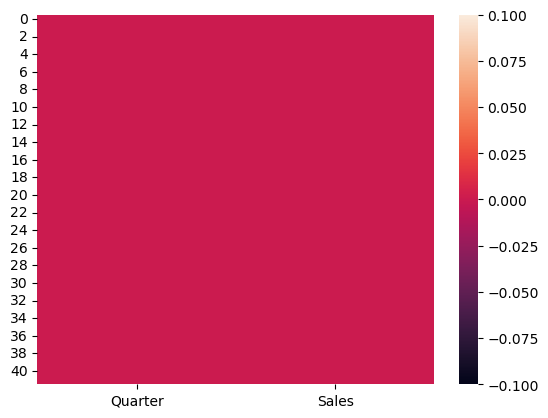

In [5]:
sns.heatmap(cocacola.isnull())

In [6]:
cocacola.corr()

C:\Users\santh\AppData\Local\Temp\ipykernel_14228\2131285406.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cocacola.corr()


,Sales
Sales,1.0


C:\Users\santh\AppData\Local\Temp\ipykernel_14228\2494818302.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cocacola.corr())


<Axes: >

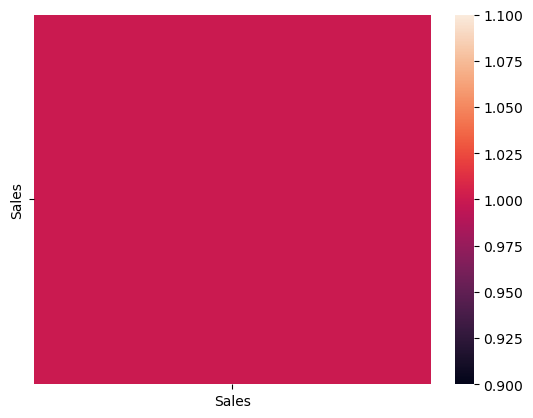

In [7]:
sns.heatmap(cocacola.corr())

In [8]:
cocacola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [9]:
cocacola1=cocacola.copy()

In [10]:
cocacola1.set_index('Quarter',inplace=True)

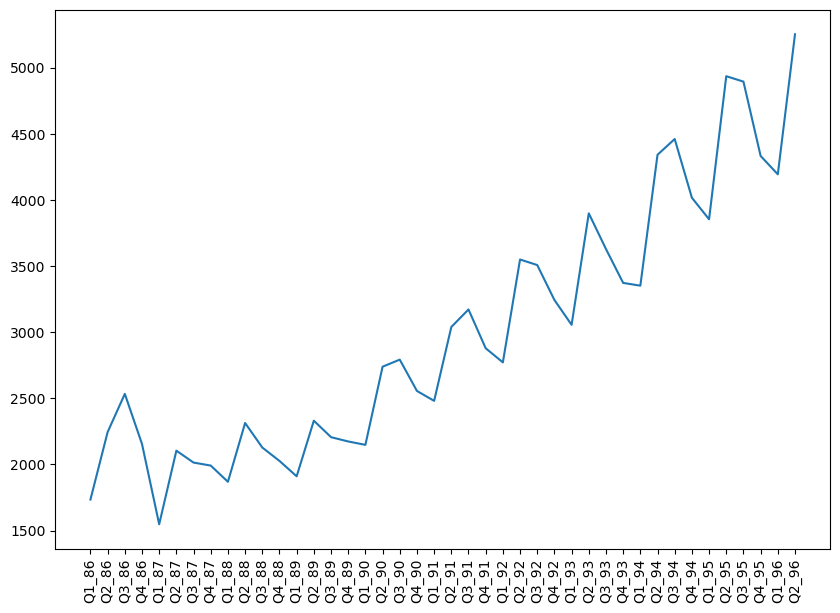

In [11]:
plt.figure(figsize=(10,7))
plt.plot(cocacola1)
plt.xticks(rotation=90)
plt.show()

In [13]:
t = cocacola.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')
cocacola['quarter']=pd.to_datetime(t).dt.strftime('%b-%Y')
cocacola['quarter']=pd.to_datetime(cocacola['quarter'])

C:\Users\santh\AppData\Local\Temp\ipykernel_14228\2478871553.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  t = cocacola.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')


In [14]:
cocacola.set_index('quarter',inplace=True)
cocacola.head()

,Quarter,Sales
quarter,,
1986-01-01,Q1_86,1734.827000
1986-04-01,Q2_86,2244.960999
1986-07-01,Q3_86,2533.804993
1986-10-01,Q4_86,2154.962997
1987-01-01,Q1_87,1547.818996


In [15]:
cocacola['Quarters'] = 0
cocacola['Year'] = 0
for i in range(42):
    p = cocacola["Quarter"][i]
    cocacola['Quarters'][i]= p[0:2]
    cocacola['Year'][i]= p[3:5]

C:\Users\santh\AppData\Local\Temp\ipykernel_14228\4160946572.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cocacola['Quarters'][i]= p[0:2]
C:\Users\santh\AppData\Local\Temp\ipykernel_14228\4160946572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cocacola['Year'][i]= p[3:5]


In [16]:
cocacola

,Quarter,Sales,Quarters,Year
quarter,,,,
1986-01-01,Q1_86,1734.827000,Q1,86
1986-04-01,Q2_86,2244.960999,Q2,86
1986-07-01,Q3_86,2533.804993,Q3,86
1986-10-01,Q4_86,2154.962997,Q4,86
1987-01-01,Q1_87,1547.818996,Q1,87
1987-04-01,Q2_87,2104.411995,Q2,87
1987-07-01,Q3_87,2014.362999,Q3,87
1987-10-01,Q4_87,1991.746998,Q4,87
1988-01-01,Q1_88,1869.049999,Q1,88


In [17]:
cocacola2=cocacola.copy()


In [18]:
cocacola2.drop('Quarter',axis=1,inplace=True)
cocacola2

,Sales,Quarters,Year
quarter,,,
1986-01-01,1734.827000,Q1,86
1986-04-01,2244.960999,Q2,86
1986-07-01,2533.804993,Q3,86
1986-10-01,2154.962997,Q4,86
1987-01-01,1547.818996,Q1,87
1987-04-01,2104.411995,Q2,87
1987-07-01,2014.362999,Q3,87
1987-10-01,1991.746998,Q4,87
1988-01-01,1869.049999,Q1,88


In [19]:
data_encoded = pd.get_dummies(cocacola2, columns=['Quarters'])
data_encoded.head()

,Sales,Year,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4
quarter,,,,,,
1986-01-01,1734.827000,86,1,0,0,0
1986-04-01,2244.960999,86,0,1,0,0
1986-07-01,2533.804993,86,0,0,1,0
1986-10-01,2154.962997,86,0,0,0,1
1987-01-01,1547.818996,87,1,0,0,0


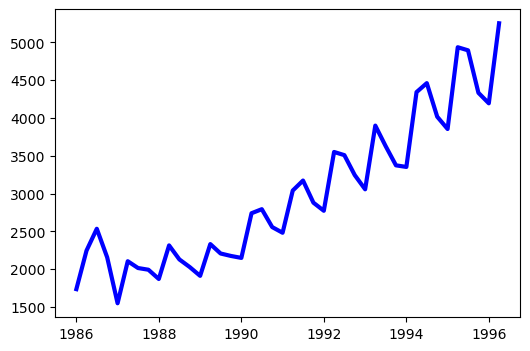

In [21]:
# Lineplot for Sales of CocaCola
plt.figure(figsize=(6,4))
plt.plot(cocacola2['Sales'], color = 'blue', linewidth=3)
plt.show()

<Axes: xlabel='Quarters', ylabel='Sales'>

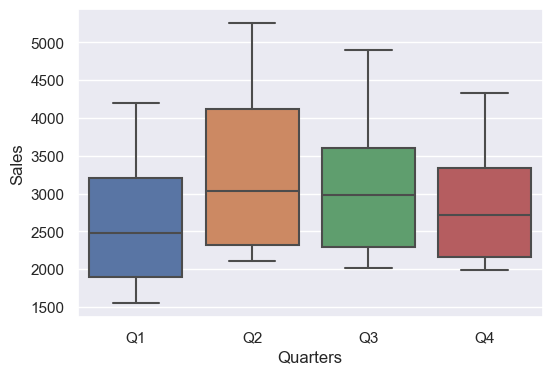

In [22]:
#boxplot of Quarters Vs. Sales
sns.set(rc={'figure.figsize':(6,4)})
sns.boxplot(x="Quarters",y="Sales",data=cocacola2)

<Axes: xlabel='Year', ylabel='Sales'>

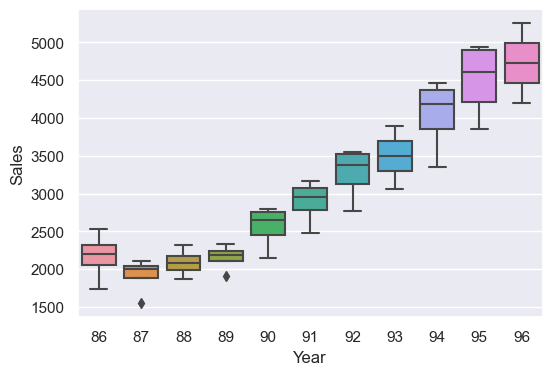

In [23]:
# boxplot of Years Vs. Sales
sns.boxplot(x="Year",y="Sales",data=cocacola2)

<Axes: xlabel='Year', ylabel='Sales'>

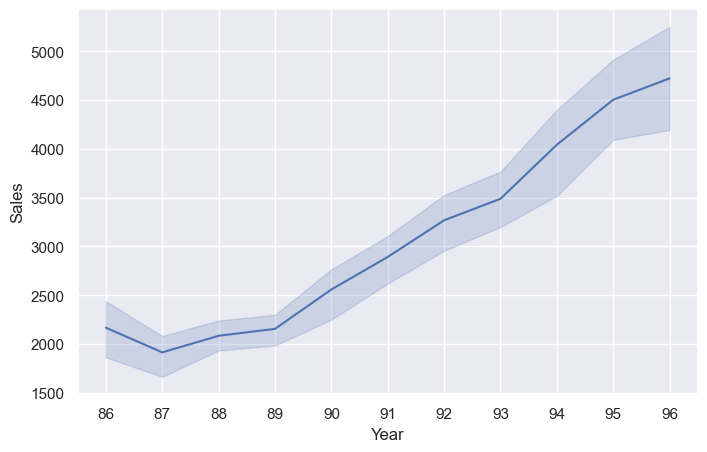

In [24]:
plt.figure(figsize=(8,5))
sns.lineplot(x="Year",y="Sales",data=cocacola2)

<Axes: >

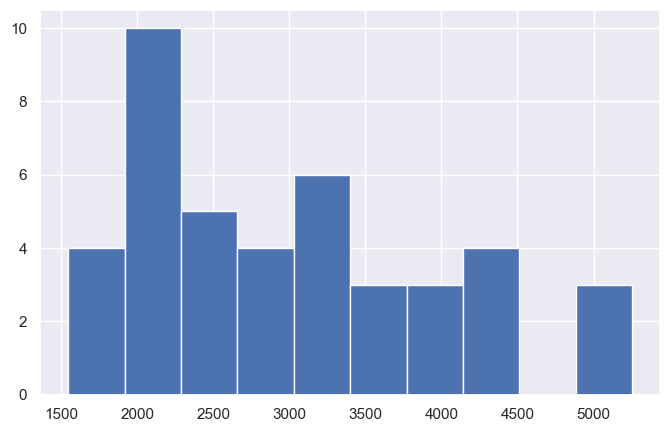

In [25]:
# Histogram
cocacola2['Sales'].hist(figsize=(8,5))

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

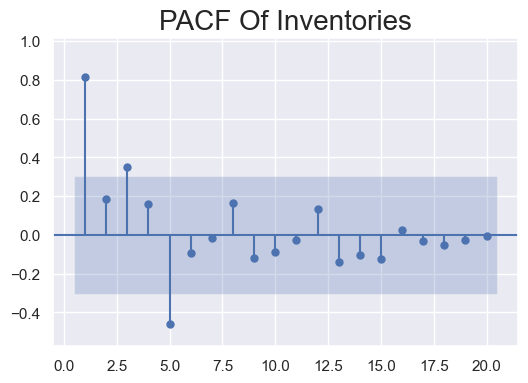

In [27]:
plot_pacf(cocacola2.Sales, lags=20, zero=False,auto_ylims=True)
plt.title("PACF Of Inventories",size=20)
plt.show()

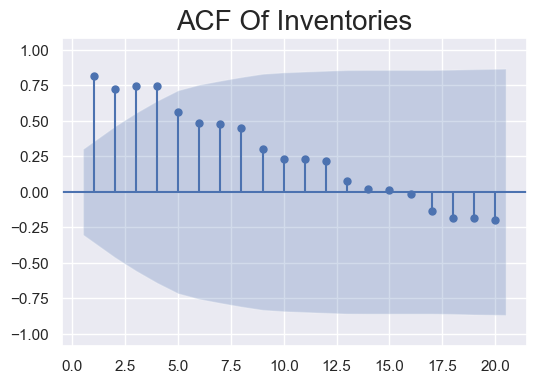

In [28]:
plot_acf(cocacola2.Sales, lags=20, zero=False, auto_ylims=True)
plt.title("ACF Of Inventories",size=20)
plt.show()

In [29]:
endog = cocacola2['Sales']

In [31]:
from statsmodels.tsa.seasonal import STL,seasonal_decompose

[]

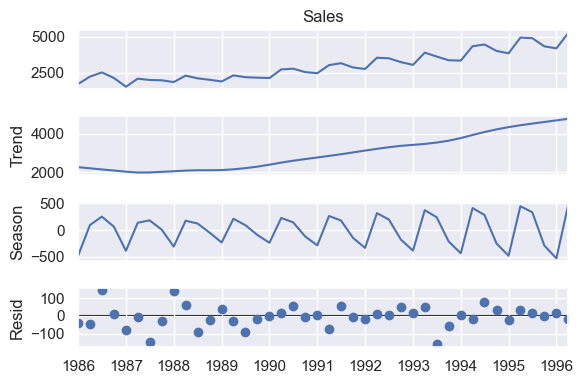

In [32]:
res = STL(endog).fit()
res.plot()
plt.plot()

In [34]:
train_length=int(len(cocacola2)*0.75)
test_length=len(cocacola2)-train_length
train_length,test_length

(31, 11)

In [36]:
train_data=cocacola2.Sales.iloc[:train_length]
test_data=cocacola2.Sales.iloc[train_length:]

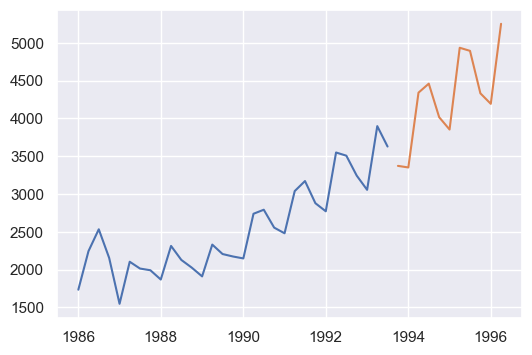

In [37]:
plt.plot(train_data)
plt.plot(test_data)
plt.show()

In [38]:
columns_drop=['Quarters','Year']

In [39]:
cocacola3=cocacola2.copy()

In [40]:
cocacola3=cocacola3.iloc[:,0]

In [41]:
cocacola3

quarter
1986-01-01    1734.827000
1986-04-01    2244.960999
1986-07-01    2533.804993
1986-10-01    2154.962997
1987-01-01    1547.818996
1987-04-01    2104.411995
1987-07-01    2014.362999
1987-10-01    1991.746998
1988-01-01    1869.049999
1988-04-01    2313.631996
1988-07-01    2128.320000
1988-10-01    2026.828999
1989-01-01    1910.603996
1989-04-01    2331.164993
1989-07-01    2206.549995
1989-10-01    2173.967995
1990-01-01    2148.278000
1990-04-01    2739.307999
1990-07-01    2792.753998
1990-10-01    2556.009995
1991-01-01    2480.973999
1991-04-01    3039.522995
1991-07-01    3172.115997
1991-10-01    2879.000999
1992-01-01    2772.000000
1992-04-01    3550.000000
1992-07-01    3508.000000
1992-10-01    3243.859993
1993-01-01    3056.000000
1993-04-01    3899.000000
1993-07-01    3629.000000
1993-10-01    3373.000000
1994-01-01    3352.000000
1994-04-01    4342.000000
1994-07-01    4461.000000
1994-10-01    4017.000000
1995-01-01    3854.000000
1995-04-01    4936.000000
1995

In [42]:
### Augmented Dickey Fuller Test for Stationarity

In [43]:
from statsmodels.tsa.stattools import adfuller

In [44]:
def adf_test(data):
    ## H0: Data is not Stationary
    ## H1: Data is Stationary
    if adfuller(data)[1] > 0.05:
        print("Failed to reject the null hypothesis")
        print('Data is Not stationary')
    else:
        print("Reject the null hypothesis")
        print("Data is stationary")

In [45]:
adf_test(cocacola3)

Failed to reject the null hypothesis
Data is Not stationary


In [46]:
### Diffrencing the data

In [47]:
from statsmodels.tsa.statespace.tools import diff

In [48]:
df_1 = diff(cocacola3,k_diff=1)

In [49]:
adf_test(df_1)

Failed to reject the null hypothesis
Data is Not stationary


In [50]:
df_2= diff(cocacola3,k_diff=2)

In [51]:
adf_test(df_2)

Reject the null hypothesis
Data is stationary


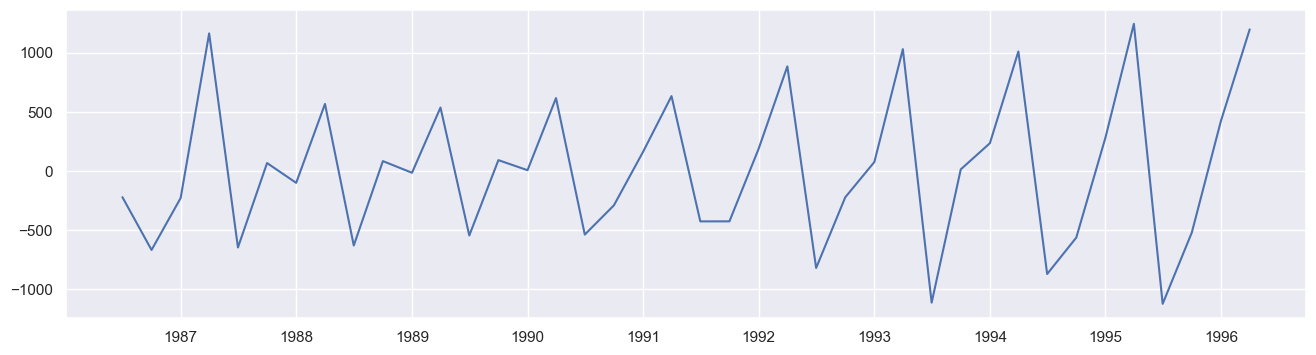

In [52]:
plt.figure(figsize=(16,4))

plt.plot(df_2)
plt.show()

In [53]:
### Find the order of ARIMA

In [54]:
### a. Use ACF and PACF plots

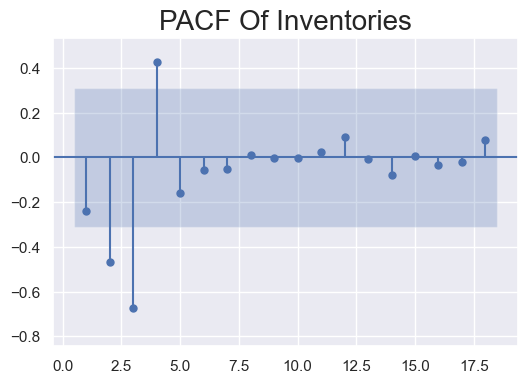

In [55]:
plot_pacf(df_2, lags=18, zero=False, auto_ylims=True)
plt.title("PACF Of Inventories",size=20)
plt.show()

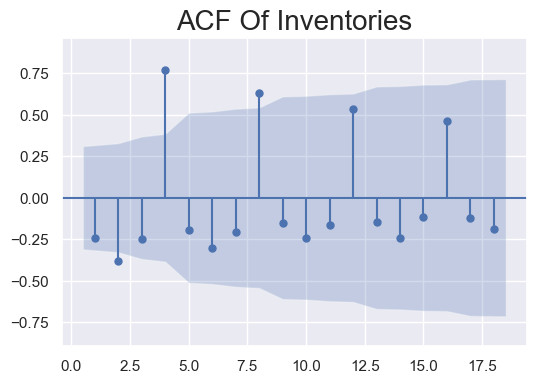

In [56]:
plot_acf(df_2, lags=18, zero=False, auto_ylims=True)
plt.title("ACF Of Inventories",size=20)
plt.show()

In [57]:
from pmdarima import auto_arima

In [58]:
auto_model=auto_arima(df_2,trace=True,seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=576.244, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=631.417, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=630.871, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=541.164, Time=0.30 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=542.786, Time=0.21 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=544.594, Time=0.37 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=544.771, Time=0.35 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=542.025, Time=0.13 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=547.607, Time=0.37 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 3.05

In [59]:
train_length=int(len(df_2)*0.80)
test_length=len(df_2)-train_length
train_length,test_length

(32, 8)

In [60]:
df_2 = pd.DataFrame(df_2)

In [61]:
train_data=df_2.iloc[:train_length]
test_data=df_2.iloc[train_length:]

In [62]:
auto_model.predict(test_length)

1996-07-01   -1111.073282
1996-10-01    -457.134518
1997-01-01     431.639531
1997-04-01    1080.251062
1997-07-01   -1100.203523
1997-10-01    -367.669865
1998-01-01     441.990109
1998-04-01     969.714859
Freq: QS-OCT, dtype: float64

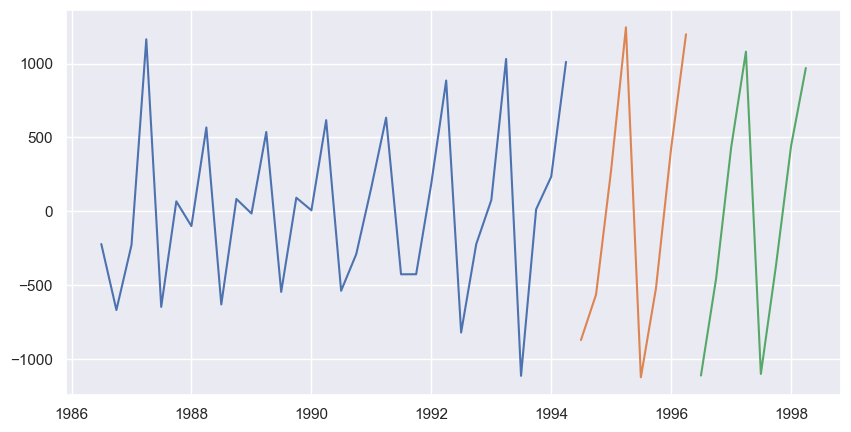

In [64]:
plt.figure(figsize=(10,5))
plt.plot(train_data)
plt.plot(test_data)
plt.plot(auto_model.predict(test_length)) 

In [65]:
#Perform the same using Exponential smoothing
#Basic raw data contains Trend + No Seasonality

In [66]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [67]:
train_length1=int(len(data_encoded)*0.80)
test_length1=len(data_encoded)-train_length1
train_length1,test_length1

(33, 9)

In [68]:
train_datas=data_encoded.Sales.astype(float).iloc[:train_length1]
test_datas=data_encoded.Sales.astype(float).iloc[train_length1:]

In [69]:
desadd_model = ExponentialSmoothing(train_datas, trend='add').fit()

C:\Users\santh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [70]:
testresults=test_datas.copy()

In [72]:
testresults['DES_Add'] = desadd_model.forecast(test_length1)
testresults

quarter
1994-04-01 00:00:00                                               4342.0
1994-07-01 00:00:00                                               4461.0
1994-10-01 00:00:00                                               4017.0
1995-01-01 00:00:00                                               3854.0
1995-04-01 00:00:00                                               4936.0
1995-07-01 00:00:00                                               4895.0
1995-10-01 00:00:00                                               4333.0
1996-01-01 00:00:00                                               4194.0
1996-04-01 00:00:00                                               5253.0
DES_Add                1994-04-01    3710.953822
1994-07-01    3763.9...
Name: Sales, dtype: object

[]

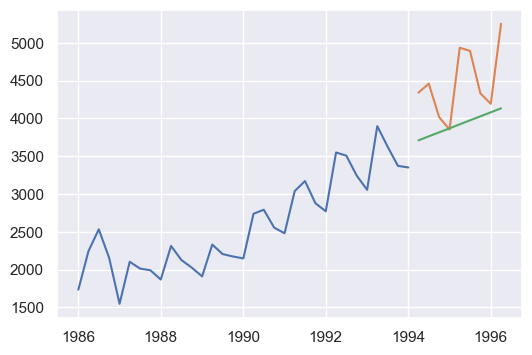

In [73]:
plt.plot(train_datas)
plt.plot(test_datas)
plt.plot(testresults['DES_Add'])
plt.plot()

In [74]:
mse=mean_squared_error(test_datas,testresults['DES_Add'])
rmse=np.sqrt(mse)
mae=mean_absolute_error(test_datas,testresults['DES_Add'])
mape=mean_absolute_percentage_error(test_datas,testresults['DES_Add'])

In [75]:
test_metrics=pd.DataFrame(index=['MSE','RMSE','MAE','MAPE'])

In [76]:
test_metrics['DES_Add']=[mse,rmse,mae,mape]
test_metrics

,DES_Add
MSE,461260.610435
RMSE,679.161697
MAE,556.784592
MAPE,0.117600


In [77]:
data_encoded['Log_Sales'] = np.log(data_encoded['Sales'])

In [78]:
train_datas1=data_encoded.Log_Sales.astype(float).iloc[:train_length1]
test_datas1=data_encoded.Log_Sales.astype(float).iloc[train_length1:]

In [79]:
desmul_model = ExponentialSmoothing(train_datas1, trend='mul').fit()

C:\Users\santh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [80]:
testresults['DES_Mul'] = desmul_model.forecast(test_length1)
testresults.head(3)

quarter
1994-04-01 00:00:00    4342.0
1994-07-01 00:00:00    4461.0
1994-10-01 00:00:00    4017.0
Name: Sales, dtype: object

[]

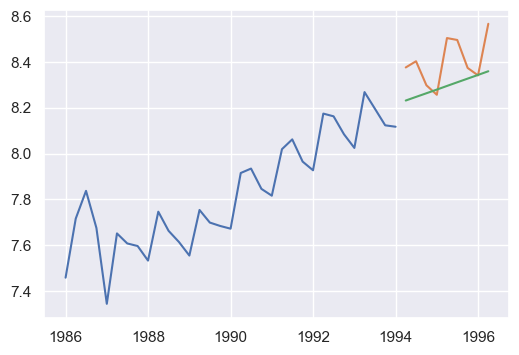

In [81]:
plt.plot(train_datas1)
plt.plot(test_datas1)
plt.plot(testresults['DES_Mul'])
plt.plot()

In [82]:
mse=mean_squared_error(test_datas1,testresults['DES_Mul'])
rmse=np.sqrt(mse)
mae=mean_absolute_error(test_datas1,testresults['DES_Mul'])
mape=mean_absolute_percentage_error(test_datas,testresults['DES_Mul'])

In [83]:
test_metrics=pd.DataFrame(index=['MSE','RMSE','MAE','MAPE'])

In [84]:
test_metrics['DES_Mul']=[mse,rmse,mae,mape]
test_metrics

,DES_Mul
MSE,0.018838
RMSE,0.137252
MAE,0.111837
MAPE,0.998130


In [85]:
final_model=ExponentialSmoothing(data_encoded['Log_Sales'],trend='mul').fit()

C:\Users\santh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [86]:
forecast_values=final_model.forecast(test_length1)

In [87]:
forecast_values

1996-07-01    8.528851
1996-10-01    8.555978
1997-01-01    8.583190
1997-04-01    8.610490
1997-07-01    8.637876
1997-10-01    8.665349
1998-01-01    8.692909
1998-04-01    8.720558
1998-07-01    8.748294
Freq: QS-OCT, dtype: float64

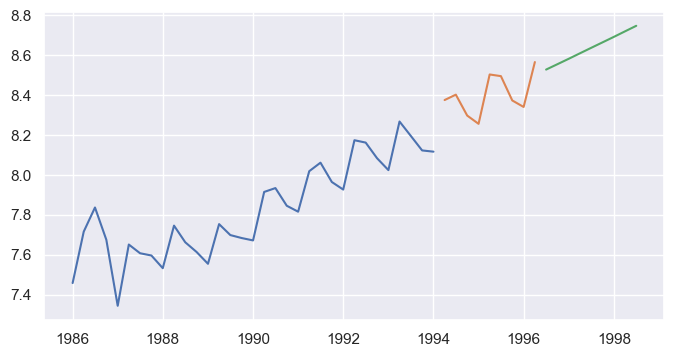

In [88]:
plt.figure(figsize=(8,4))
plt.plot(train_datas1)
plt.plot(test_datas1)
plt.plot(forecast_values)
#plt.xlim('1958-01-01','1960-12-01')
plt.show()

In [90]:
data_encoded['Log_Sales'] = np.log(data_encoded['Sales'])
new_data=data_encoded

In [91]:
###Its better to do in Double Exponential Smoothing Multiplicative Method

In [92]:
new_data=data_encoded

In [93]:
t=np.arange(1,43)

In [94]:
new_data['t'] =t

In [95]:
new_data['t_sq'] = new_data['t']*new_data['t']

In [96]:
new_data

,Sales,Year,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4,Log_Sales,t,t_sq
quarter,,,,,,,,,
1986-01-01,1734.827000,86,1,0,0,0,7.458663,1,1
1986-04-01,2244.960999,86,0,1,0,0,7.716443,2,4
1986-07-01,2533.804993,86,0,0,1,0,7.837477,3,9
1986-10-01,2154.962997,86,0,0,0,1,7.675529,4,16
1987-01-01,1547.818996,87,1,0,0,0,7.344602,5,25
1987-04-01,2104.411995,87,0,1,0,0,7.651791,6,36
1987-07-01,2014.362999,87,0,0,1,0,7.608058,7,49
1987-10-01,1991.746998,87,0,0,0,1,7.596767,8,64
1988-01-01,1869.049999,88,1,0,0,0,7.533186,9,81


In [97]:
import statsmodels.formula.api as smf

In [98]:
train1, test1 = np.split(new_data, [int(.67 *len(new_data))])

In [99]:
linear= smf.ols('Sales ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Sales'])-np.array(predlin))**2))
rmselin

580.1224131670788

In [100]:
quad=smf.ols('Sales~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predquad))**2))
rmsequad

783.7297975323821

In [101]:
expo=smf.ols('Log_Sales~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

588.1405105639889

In [102]:
additive= smf.ols('Sales~ Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Quarters_Q1','Quarters_Q2','Quarters_Q3','Quarters_Q4']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predadd))**2))
rmseadd

1770.007917041625

In [103]:
addlinear= smf.ols('Sales~t+Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Quarters_Q1','Quarters_Q2','Quarters_Q3','Quarters_Q4']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

696.6333922144973

In [104]:
addquad=smf.ols('Sales~t+t_sq+Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Quarters_Q1','Quarters_Q2','Quarters_Q3','Quarters_Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddquad))**2))
rmseaddquad

707.7965578317817

In [105]:
mulsea=smf.ols('Log_Sales~Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Quarters_Q1','Quarters_Q2','Quarters_Q3','Quarters_Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

1809.673357039924

In [106]:
mullin= smf.ols('Log_Sales~t+Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','Quarters_Q1','Quarters_Q2','Quarters_Q3','Quarters_Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

492.57755978736463

In [107]:
mul_quad= smf.ols('Log_Sales~t+t_sq+Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','Quarters_Q1','Quarters_Q2','Quarters_Q3','Quarters_Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

2015.374539875914

In [108]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}

In [109]:
rmse=pd.DataFrame(output)

In [110]:
print(rmse)

           Model       Values
0  rmse_mul_quad  2015.374540
1        rmseadd  1770.007917
2  rmseaddlinear   696.633392
3    rmseaddquad   707.796558
4       rmseexpo   588.140511
5        rmselin   580.122413
6        rmsemul  1809.673357
7      rmsemulin   492.577560
8       rmsequad   783.729798
